

During the feature selection part of the model, we figured out that very different sets of features were chosen 
in different runs. Hence, a decision was made to search for highly correlated features among all the features 
in the dataset.

The following code looks for highly correlated features in the model's input data.


In [3]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [14]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Whether or not to save the figures
save_fig = True

In [6]:
input_dir = Path(os.getenv("STORM_DATA_DIR")) / "input/01_baseline_model"
output_dir = Path(os.getenv("STORM_DATA_DIR")) / "output/01_baseline_model"

## Data cleaning

TODO: If this is needed in every notebook, should 
refactor it to a first notebook and save the output,
or make a helper function that does it

In [7]:
# Read in input data
combined_input_data = pd.read_csv(input_dir / "combined_input_data.csv")
combined_input_data

Mun_Code     typhoon  HAZ_rainfall_Total  HAZ_rainfall_max_6h  \
0      PH175101000  durian2006          185.828571            14.716071   
1      PH030801000  durian2006           28.487500             1.893750   
2      PH083701000  durian2006            8.818750             0.455208   
3      PH045601000  durian2006          193.083333            13.283333   
4      PH015501000  durian2006           24.175000             2.408333   
...            ...         ...                 ...                  ...   
25838  PH025014000    noul2015           11.487500             0.614583   
25839  PH140127000    noul2015           11.600000             1.400000   
25840  PH012823000    noul2015           42.227273             2.940152   
25841  PH051612000    noul2015           32.305556             1.744444   
25842  PH052011000    noul2015           47.062500             3.289583   

       HAZ_rainfall_max_24h  HAZ_v_max  HAZ_dis_track_min  GEN_landslide_per  \
0                  7.381696  55.032241           2.478142               2.64   
1                  1.070833  23.402905         136.527982               0.78   
2                  0.255319   8.728380         288.358553               0.06   
3                  7.378472  52.891105          41.386956               3.53   
4                  0.957639  10.945624         274.953818               1.52   
...                     ...        ...                ...                ...   
25838              0.230319  15.791907         210.313249               0.06   
25839              0.412766  13.867145         218.189328               0.00   
25840              0.864217  18.174500         154.588189               1.08   
25841              1.210417  15.647639         219.542224               4.15   
25842              1.731771  15.018557         177.362033               1.05   

       GEN_stormsurge_per  GEN_Bu_p_inSSA  ...  VUL_StrongRoof_SalvageWall  \
0                    6.18            6.18  ...                    0.097425   
1                   40.87           40.80  ...                    0.118842   
2                    0.00            0.00  ...                    0.850008   
3                    2.77            2.77  ...                    0.697085   
4                    1.28            1.28  ...                    0.197179   
...                   ...             ...  ...                         ...   
25838                0.09            0.09  ...                    0.202748   
25839                0.00            0.00  ...                    0.000000   
25840                0.00            0.00  ...                    0.104085   
25841                3.05            3.05  ...                    0.031146   
25842               10.84           10.80  ...                    0.247359   

       VUL_LightRoof_StrongWall  VUL_LightRoof_LightWall  \
0                      2.533055                41.892832   
1                      0.248487                 2.182368   
2                      1.218595                13.645253   
3                      1.774398                15.082383   
4                      0.667374                15.592295   
...                         ...                      ...   
25838                  0.090110                 3.063753   
25839                  0.094518                 3.119093   
25840                  0.143117                 0.832683   
25841                 12.198920                36.191860   
25842                  3.035165                14.032625   

       VUL_LightRoof_SalvageWall  VUL_SalvagedRoof_StrongWall  \
0                       1.002088                     0.000000   
1                       0.000000                     0.000000   
2                       0.549120                     0.030089   
3                       0.443599                     0.000000   
4                       0.075838                     0.000000   
...                          ...                          ...   
25838                   0.022528   

In [8]:
# TODO: This seems to have no effect. Remove?
typhoons_with_impact_data = [
    "bopha2012",
    "conson2010",
    "durian2006",
    "fengshen2008",
    "fung-wong2014",
    "goni2015",
    "goni2020",
    "hagupit2014",
    "haima2016",
    "haiyan2013",
    "jangmi2014",
    "kalmaegi2014",
    "kammuri2019",
    "ketsana2009",
    "koppu2015",
    "krosa2013",
    "linfa2015",
    "lingling2014",
    "mangkhut2018",
    "mekkhala2015",
    "melor2015",
    "meranti2016",
    "molave2020",
    "mujigae2015",
    "nakri2019",
    "nari2013",
    "nesat2011",
    "nock-ten2016",
    "noul2015",
    "phanfone2019",
    "rammasun2014",
    "sarika2016",
    "saudel2020",
    "tokage2016",
    "trami2013",
    "usagi2013",
    "utor2013",
    "vamco2020",
    "vongfong2020",
    "yutu2018",
]
combined_input_data = combined_input_data[
    combined_input_data.typhoon.isin(typhoons_with_impact_data)
]
combined_input_data

Mun_Code     typhoon  HAZ_rainfall_Total  HAZ_rainfall_max_6h  \
0      PH175101000  durian2006          185.828571            14.716071   
1      PH030801000  durian2006           28.487500             1.893750   
2      PH083701000  durian2006            8.818750             0.455208   
3      PH045601000  durian2006          193.083333            13.283333   
4      PH015501000  durian2006           24.175000             2.408333   
...            ...         ...                 ...                  ...   
25838  PH025014000    noul2015           11.487500             0.614583   
25839  PH140127000    noul2015           11.600000             1.400000   
25840  PH012823000    noul2015           42.227273             2.940152   
25841  PH051612000    noul2015           32.305556             1.744444   
25842  PH052011000    noul2015           47.062500             3.289583   

       HAZ_rainfall_max_24h  HAZ_v_max  HAZ_dis_track_min  GEN_landslide_per  \
0                  7.381696  55.032241           2.478142               2.64   
1                  1.070833  23.402905         136.527982               0.78   
2                  0.255319   8.728380         288.358553               0.06   
3                  7.378472  52.891105          41.386956               3.53   
4                  0.957639  10.945624         274.953818               1.52   
...                     ...        ...                ...                ...   
25838              0.230319  15.791907         210.313249               0.06   
25839              0.412766  13.867145         218.189328               0.00   
25840              0.864217  18.174500         154.588189               1.08   
25841              1.210417  15.647639         219.542224               4.15   
25842              1.731771  15.018557         177.362033               1.05   

       GEN_stormsurge_per  GEN_Bu_p_inSSA  ...  VUL_StrongRoof_SalvageWall  \
0                    6.18            6.18  ...                    0.097425   
1                   40.87           40.80  ...                    0.118842   
2                    0.00            0.00  ...                    0.850008   
3                    2.77            2.77  ...                    0.697085   
4                    1.28            1.28  ...                    0.197179   
...                   ...             ...  ...                         ...   
25838                0.09            0.09  ...                    0.202748   
25839                0.00            0.00  ...                    0.000000   
25840                0.00            0.00  ...                    0.104085   
25841                3.05            3.05  ...                    0.031146   
25842               10.84           10.80  ...                    0.247359   

       VUL_LightRoof_StrongWall  VUL_LightRoof_LightWall  \
0                      2.533055                41.892832   
1                      0.248487                 2.182368   
2                      1.218595                13.645253   
3                      1.774398                15.082383   
4                      0.667374                15.592295   
...                         ...                      ...   
25838                  0.090110                 3.063753   
25839                  0.094518                 3.119093   
25840                  0.143117                 0.832683   
25841                 12.198920                36.191860   
25842                  3.035165                14.032625   

       VUL_LightRoof_SalvageWall  VUL_SalvagedRoof_StrongWall  \
0                       1.002088                     0.000000   
1                       0.000000                     0.000000   
2                       0.549120                     0.030089   
3                       0.443599                     0.000000   
4                       0.075838                     0.000000   
...                          ...                          ...   
25838                   0.022528   

In [9]:
# Set some values to 0
# TODO: Check this equation
def set_zeros(x):
    x_max = 25
    y_max = 50

    v_max = x[0]
    rainfall_max = x[1]
    damage = x[2]
    if pd.notnull(damage):
        value = damage
    elif v_max > x_max or rainfall_max > y_max:
        value = damage
    elif v_max < np.sqrt((1 - (rainfall_max**2 / y_max**2)) * x_max**2):
        value = 0
    # elif ((v_max < x_max)  and  (rainfall_max_6h < y_max) ):
    # elif (v_max < x_max ):
    # value = 0
    else:
        value = np.nan

    return value


combined_input_data["DAM_perc_dmg"] = combined_input_data[
    ["HAZ_v_max", "HAZ_rainfall_Total", "DAM_perc_dmg"]
].apply(set_zeros, axis="columns")

In [10]:
# TODO: I thought we want to keep NA damage values
# Remove NA values
combined_input_data = combined_input_data[combined_input_data["DAM_perc_dmg"].notnull()]
combined_input_data

Mun_Code     typhoon  HAZ_rainfall_Total  HAZ_rainfall_max_6h  \
0      PH175101000  durian2006          185.828571            14.716071   
2      PH083701000  durian2006            8.818750             0.455208   
4      PH015501000  durian2006           24.175000             2.408333   
6      PH015502000  durian2006           14.930000             1.650000   
7      PH175302000  durian2006           13.550000             1.054167   
...            ...         ...                 ...                  ...   
25835  PH084823000    noul2015            9.700000             0.408333   
25837  PH015547000    noul2015           17.587500             1.414583   
25838  PH025014000    noul2015           11.487500             0.614583   
25839  PH140127000    noul2015           11.600000             1.400000   
25841  PH051612000    noul2015           32.305556             1.744444   

       HAZ_rainfall_max_24h  HAZ_v_max  HAZ_dis_track_min  GEN_landslide_per  \
0                  7.381696  55.032241           2.478142               2.64   
2                  0.255319   8.728380         288.358553               0.06   
4                  0.957639  10.945624         274.953818               1.52   
6                  0.586250  12.108701         252.828578               0.00   
7                  0.528125  10.660943         258.194381               5.52   
...                     ...        ...                ...                ...   
25835              0.216146   8.136932         277.107823               1.80   
25837              0.386458   9.818999         305.789817               0.00   
25838              0.230319  15.791907         210.313249               0.06   
25839              0.412766  13.867145         218.189328               0.00   
25841              1.210417  15.647639         219.542224               4.15   

       GEN_stormsurge_per  GEN_Bu_p_inSSA  ...  VUL_StrongRoof_SalvageWall  \
0                    6.18            6.18  ...                    0.097425   
2                    0.00            0.00  ...                    0.850008   
4                    1.28            1.28  ...                    0.197179   
6                    0.00            0.00  ...                    0.279362   
7                    0.36            0.36  ...                    0.065703   
...                   ...             ...  ...                         ...   
25835                6.25            6.25  ...                    0.186916   
25837                0.00            0.00  ...                    0.209059   
25838                0.09            0.09  ...                    0.202748   
25839                0.00            0.00  ...                    0.000000   
25841                3.05            3.05  ...                    0.031146   

       VUL_LightRoof_StrongWall  VUL_LightRoof_LightWall  \
0                      2.533055                41.892832   
2                      1.218595                13.645253   
4                      0.667374                15.592295   
6                      0.675125                 7.100454   
7                      0.821288                30.354796   
...                         ...                      ...   
25835                  3.613707                32.492212   
25837                  0.383275                 4.703833   
25838                  0.090110                 3.063753   
25839                  0.094518                 3.119093   
25841                 12.198920                36.191860   

       VUL_LightRoof_SalvageWall  VUL_SalvagedRoof_StrongWall  \
0                       1.002088                     0.000000   
2                       0.549120                     0.030089   
4                       0.075838                     0.000000   
6                       0.023280                     0.011640   
7                       0.000000                     0.000000   
...                          ...                          ...   
25835                   0.311526   

In [11]:
# Create cubed wind feature
combined_input_data["HAZ_v_max_3"] = combined_input_data["HAZ_v_max"].apply(
    lambda x: x * x * x
)

/tmp/ipykernel_381202/4242221222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_input_data["HAZ_v_max_3"] = combined_input_data["HAZ_v_max"].apply(


In [12]:
# Drop Mun_Code since it's not a feature
combined_input_data = combined_input_data.drop(columns="Mun_Code")

In [13]:
# TODO: seems to have no effect - remove?
df = combined_input_data.dropna()
display(df)

typhoon  HAZ_rainfall_Total  HAZ_rainfall_max_6h  \
0      durian2006          185.828571            14.716071   
2      durian2006            8.818750             0.455208   
4      durian2006           24.175000             2.408333   
6      durian2006           14.930000             1.650000   
7      durian2006           13.550000             1.054167   
...           ...                 ...                  ...   
25835    noul2015            9.700000             0.408333   
25837    noul2015           17.587500             1.414583   
25838    noul2015           11.487500             0.614583   
25839    noul2015           11.600000             1.400000   
25841    noul2015           32.305556             1.744444   

       HAZ_rainfall_max_24h  HAZ_v_max  HAZ_dis_track_min  GEN_landslide_per  \
0                  7.381696  55.032241           2.478142               2.64   
2                  0.255319   8.728380         288.358553               0.06   
4                  0.957639  10.945624         274.953818               1.52   
6                  0.586250  12.108701         252.828578               0.00   
7                  0.528125  10.660943         258.194381               5.52   
...                     ...        ...                ...                ...   
25835              0.216146   8.136932         277.107823               1.80   
25837              0.386458   9.818999         305.789817               0.00   
25838              0.230319  15.791907         210.313249               0.06   
25839              0.412766  13.867145         218.189328               0.00   
25841              1.210417  15.647639         219.542224               4.15   

       GEN_stormsurge_per  GEN_Bu_p_inSSA  GEN_Bu_p_LS  ...  \
0                    6.18            6.18         2.64  ...   
2                    0.00            0.00         0.06  ...   
4                    1.28            1.28         1.52  ...   
6                    0.00            0.00         0.00  ...   
7                    0.36            0.36         5.52  ...   
...                   ...             ...          ...  ...   
25835                6.25            6.25         1.80  ...   
25837                0.00            0.00         0.00  ...   
25838                0.09            0.09         0.06  ...   
25839                0.00            0.00         0.00  ...   
25841                3.05            3.05         4.15  ...   

       VUL_LightRoof_StrongWall  VUL_LightRoof_LightWall  \
0                      2.533055                41.892832   
2                      1.218595                13.645253   
4                      0.667374                15.592295   
6                      0.675125                 7.100454   
7                      0.821288                30.354796   
...                         ...                      ...   
25835                  3.613707                32.492212   
25837                  0.383275                 4.703833   
25838                  0.090110                 3.063753   
25839                  0.094518                 3.119093   
25841                 12.198920                36.191860   

       VUL_LightRoof_SalvageWall  VUL_SalvagedRoof_StrongWall  \
0                       1.002088                     0.000000   
2                       0.549120                     0.030089   
4                       0.075838                     0.000000   
6                       0.023280                     0.011640   
7                       0.000000                     0.000000   
...                          ...                          ...   
25835                   0.311526                     0.031153   
25837                   0.027875                     0.000000   
25838                   0.022528                     0.000000   
25839                   0.000000                     0.000000   
25841                   0.280316                     0.010382   

       VUL_SalvagedRoof_LightWall  VUL_Salvag

## Correlations

In [ ]:
# TODO: This should be run separately
# The correlation Matrix is also done for the input data where the damage value is greater than 10.
# df = df[df['DAM_perc_dmg'] > 10]
# df

/tmp/ipykernel_381202/227893304.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


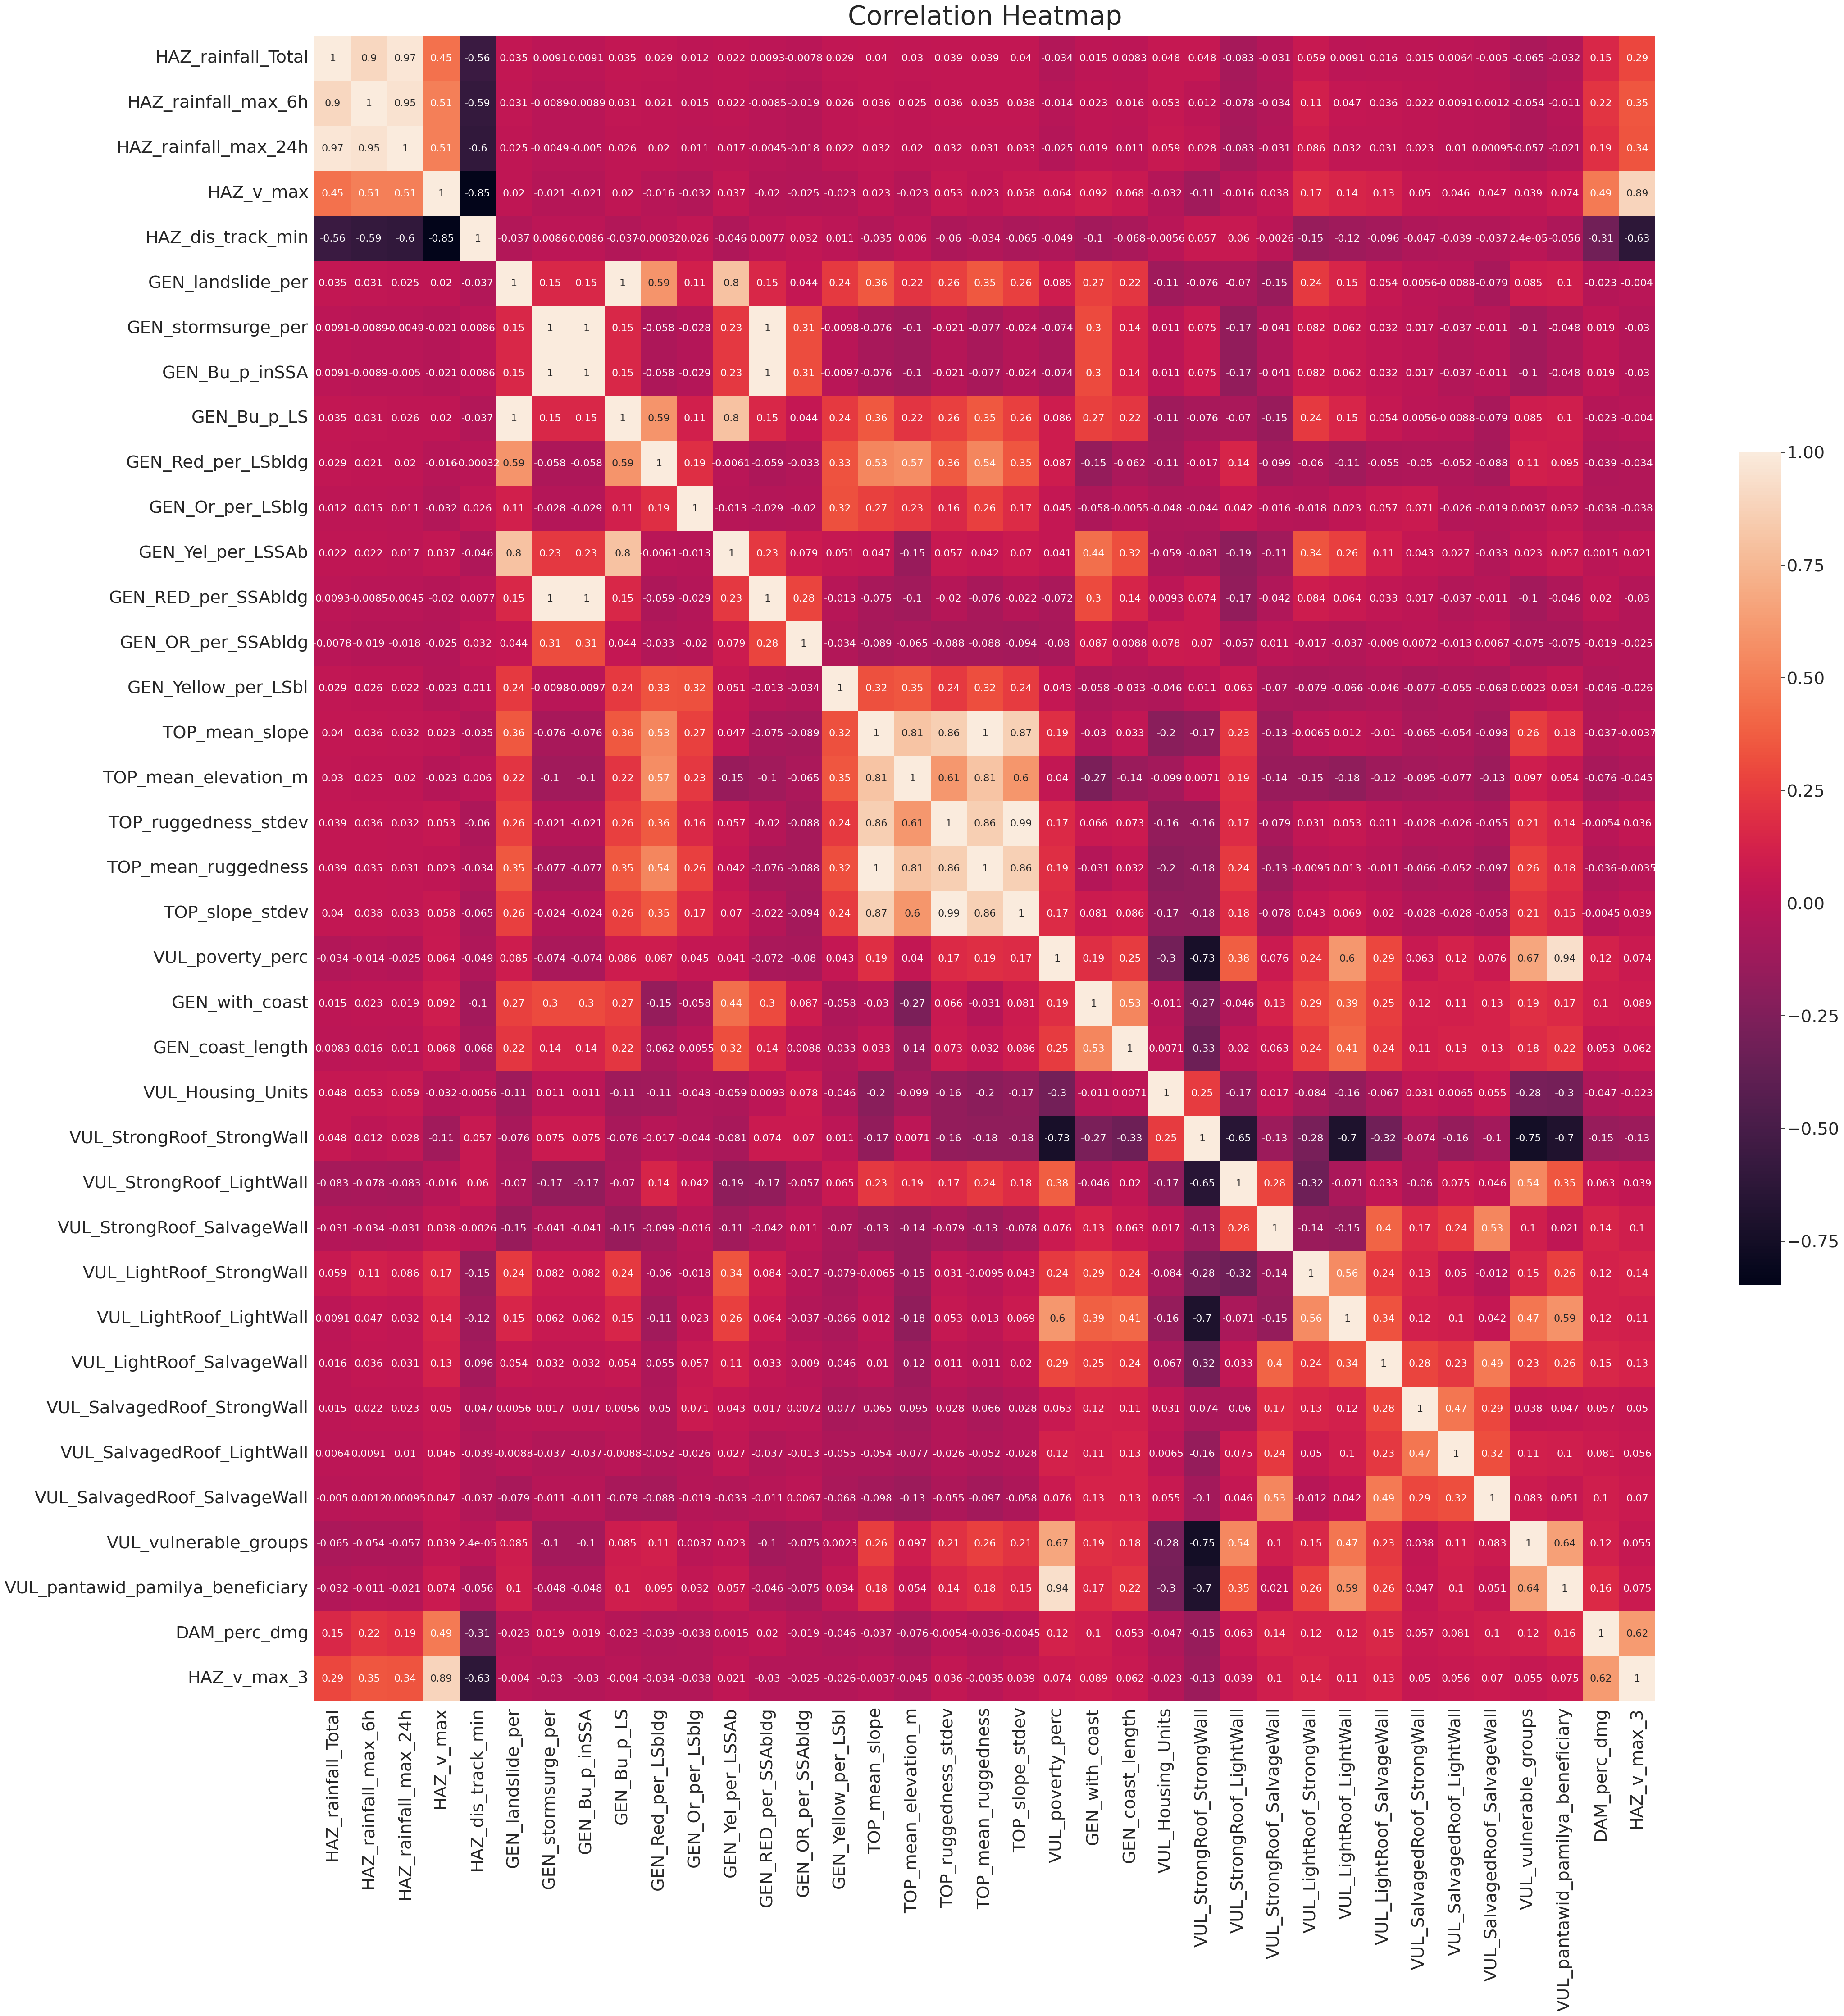

In [16]:
# get the correlation matrix
fig, ax = plt.subplots()

corrMatrix = df.corr()

plt.rcParams["figure.figsize"] = (48, 48)

sn.set(font_scale=2.5)
heatmap = sn.heatmap(
    corrMatrix, annot=True, cbar_kws={"shrink": 0.5}, annot_kws={"size": 16}
)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 42}, pad=18)

if save_fig:
    fig.savefig(output_dir / "corr_matrix.png", format="png")

plt.show()

/tmp/ipykernel_381202/148093437.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix_abs = df.corr().abs()


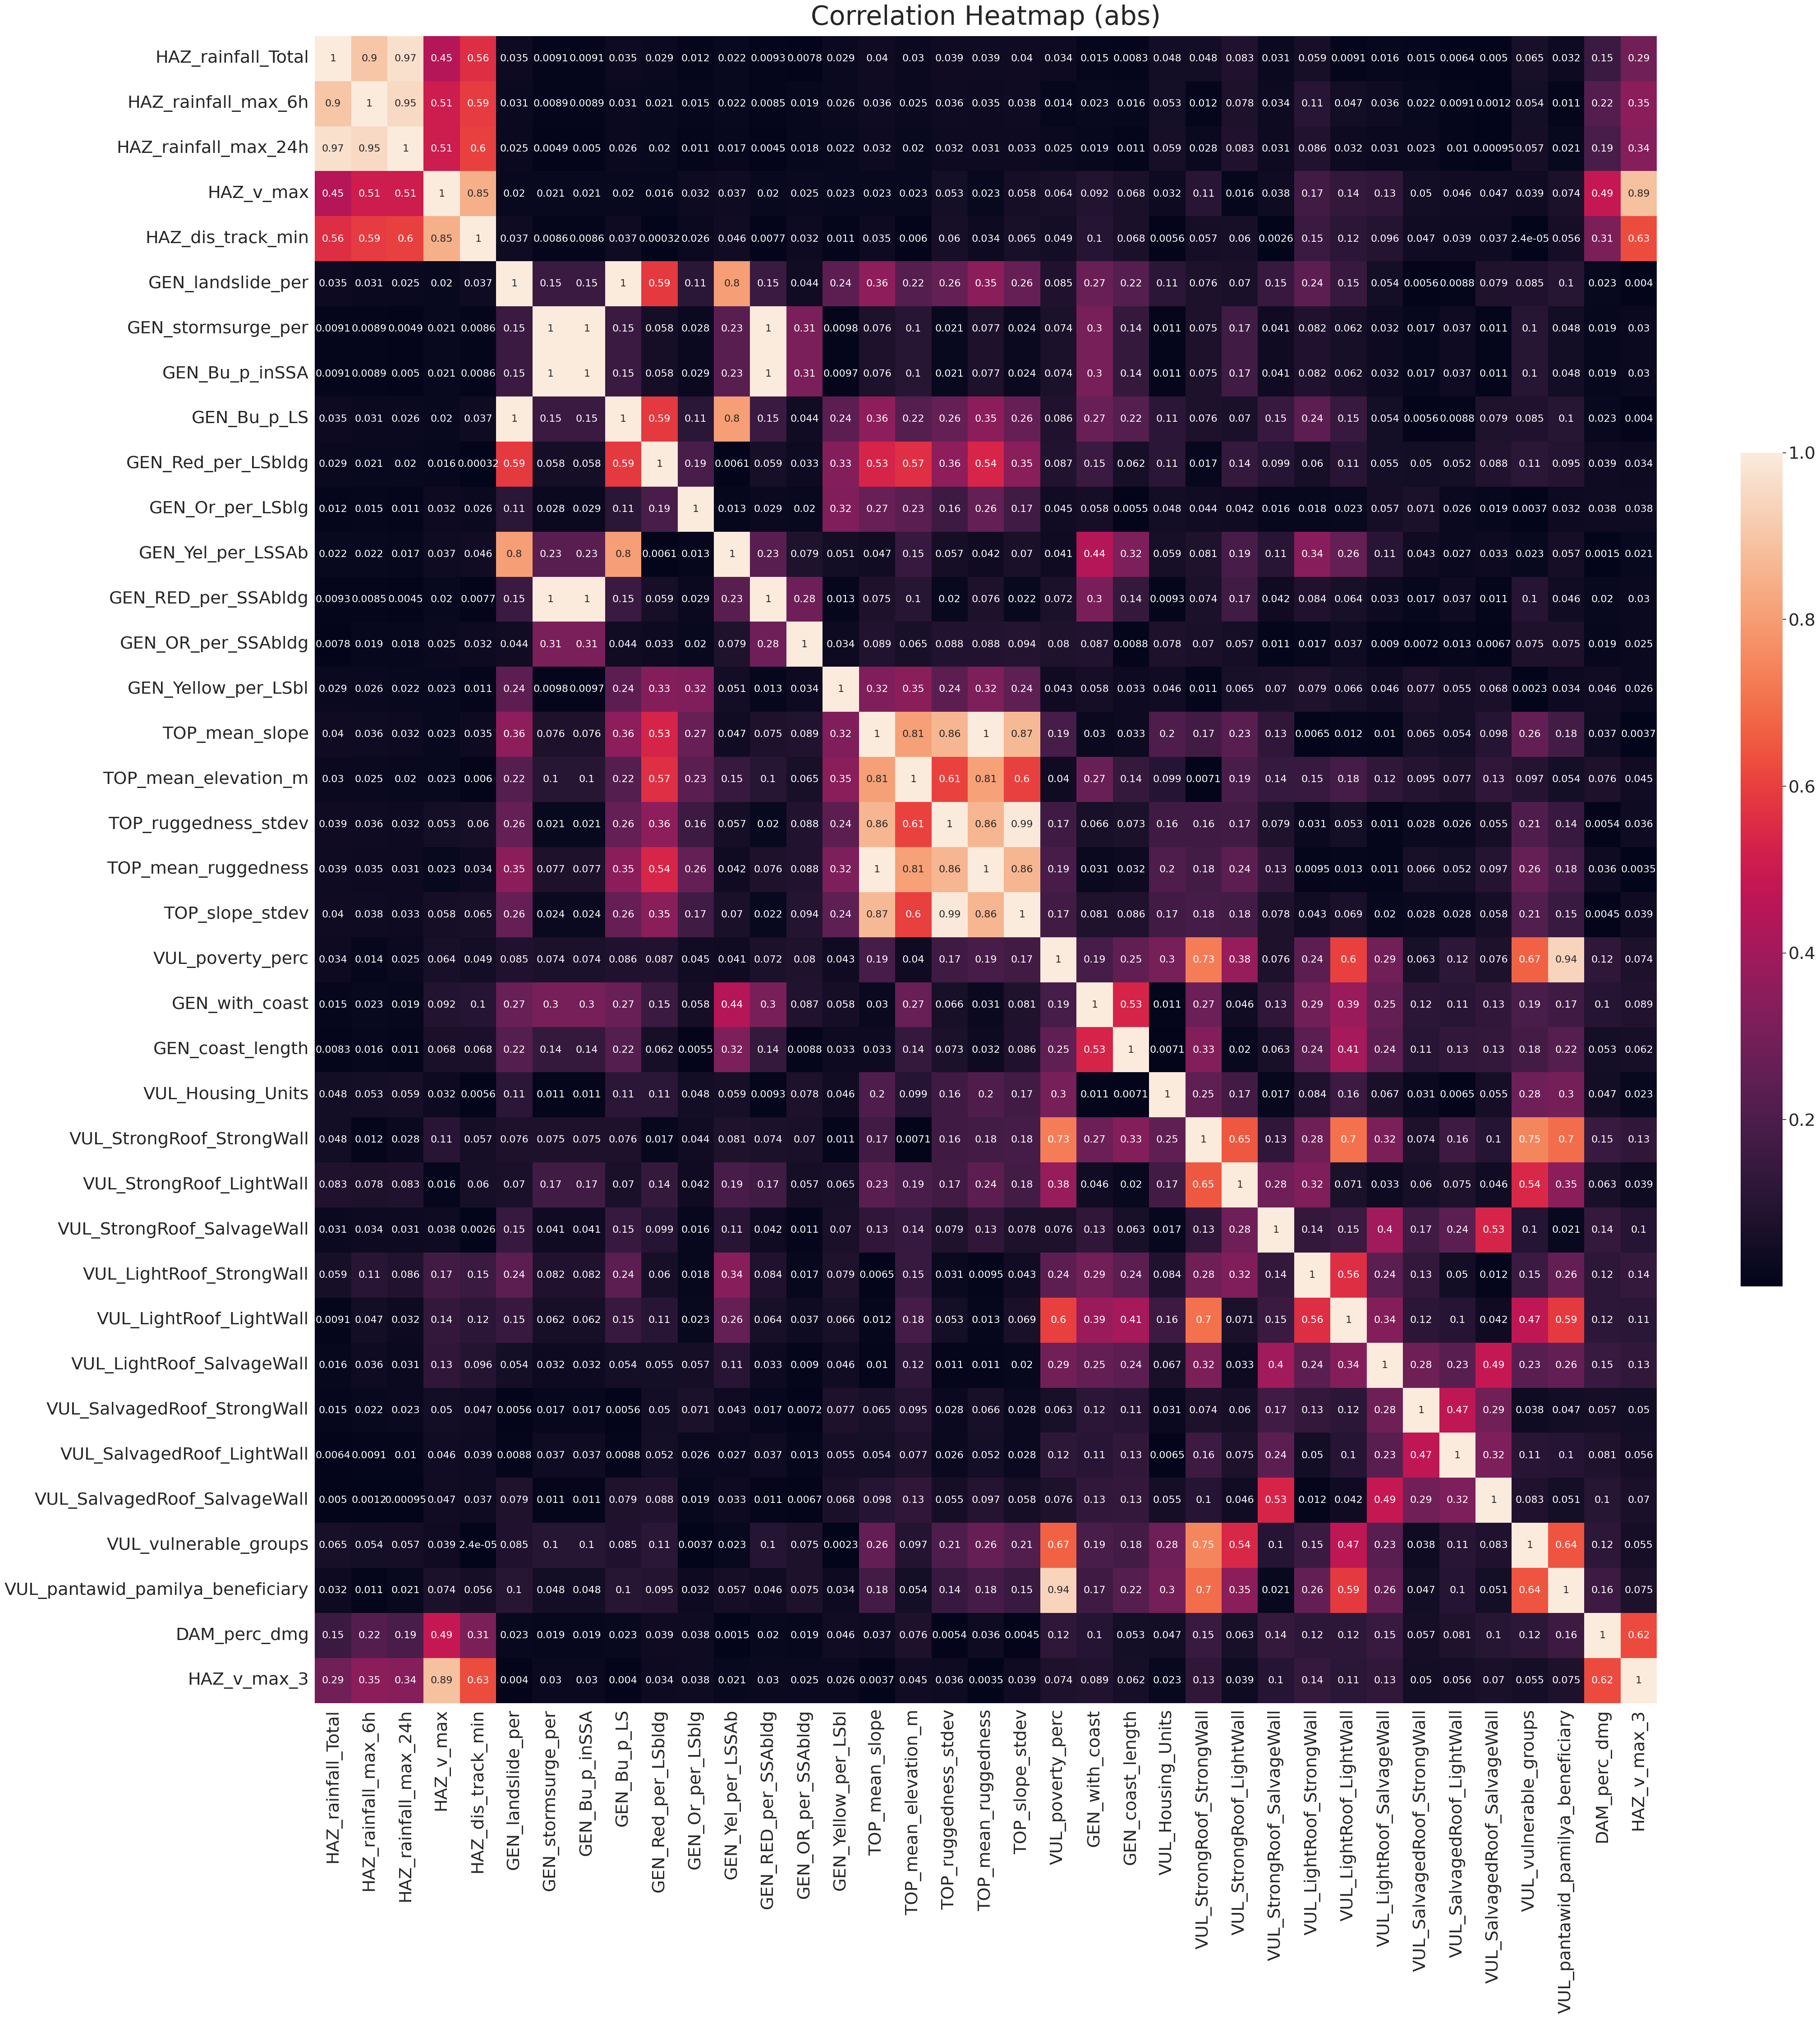

In [17]:
# get the correlation matrix (creating a square matrix with dimensions equal to the number of features)
# get the absolute value of correlation

fig, ax = plt.subplots()

corrMatrix_abs = df.corr().abs()

plt.rcParams["figure.figsize"] = (48, 48)

sn.set(font_scale=2.5)
heatmap = sn.heatmap(
    corrMatrix_abs, annot=True, cbar_kws={"shrink": 0.5}, annot_kws={"size": 16}
)
heatmap.set_title("Correlation Heatmap (abs)", fontdict={"fontsize": 42}, pad=18)

if save_fig:
    fig.savefig(output_dir / "corr_matrix_abs.png", format="png")

plt.show()

In [18]:
pair = (
    corrMatrix_abs.where(np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=True)
)
pairs = pair[pair.gt(0.8)]
print(pairs)

GEN_Bu_p_LS           GEN_Yel_per_LSSAb                   0.804135
GEN_landslide_per     GEN_Yel_per_LSSAb                   0.804226
TOP_mean_slope        TOP_mean_elevation_m                0.807596
TOP_mean_elevation_m  TOP_mean_ruggedness                 0.809930
HAZ_v_max             HAZ_dis_track_min                   0.847090
TOP_ruggedness_stdev  TOP_mean_ruggedness                 0.859740
TOP_mean_slope        TOP_ruggedness_stdev                0.861766
TOP_mean_ruggedness   TOP_slope_stdev                     0.863112
TOP_mean_slope        TOP_slope_stdev                     0.867246
HAZ_v_max             HAZ_v_max_3                         0.889916
HAZ_rainfall_Total    HAZ_rainfall_max_6h                 0.901782
VUL_poverty_perc      VUL_pantawid_pamilya_beneficiary    0.938045
HAZ_rainfall_max_6h   HAZ_rainfall_max_24h                0.949992
HAZ_rainfall_Total    HAZ_rainfall_max_24h                0.971342
TOP_ruggedness_stdev  TOP_slope_stdev                     0.99

/tmp/ipykernel_381202/1970329606.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corrMatrix_abs.where(np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(np.bool))


In [23]:
# Correlation matrix will be mirror image(all the diagonal elements=1).
# does not matter that we select the upper triangular or
# lower triangular part of the correlation matrix.

upper_tri = corrMatrix_abs.where(
    np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(np.bool)
)

/tmp/ipykernel_381202/2187006440.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(np.bool)


In [24]:
drop_value = 0.80
to_drop = [
    column for column in upper_tri.columns if any(upper_tri[column] > drop_value)
]
print(to_drop)

['HAZ_rainfall_max_6h', 'HAZ_rainfall_max_24h', 'HAZ_dis_track_min', 'GEN_Bu_p_inSSA', 'GEN_Bu_p_LS', 'GEN_Yel_per_LSSAb', 'GEN_RED_per_SSAbldg', 'TOP_mean_elevation_m', 'TOP_ruggedness_stdev', 'TOP_mean_ruggedness', 'TOP_slope_stdev', 'VUL_pantawid_pamilya_beneficiary', 'HAZ_v_max_3']


In [25]:
df = df.drop(df[to_drop], axis=1)
# print(df.head())

# %%
df = df.drop("typhoon", axis=1)
df

HAZ_rainfall_Total  HAZ_v_max  GEN_landslide_per  GEN_stormsurge_per  \
0              185.828571  55.032241               2.64                6.18   
2                8.818750   8.728380               0.06                0.00   
4               24.175000  10.945624               1.52                1.28   
6               14.930000  12.108701               0.00                0.00   
7               13.550000  10.660943               5.52                0.36   
...                   ...        ...                ...                 ...   
25835            9.700000   8.136932               1.80                6.25   
25837           17.587500   9.818999               0.00                0.00   
25838           11.487500  15.791907               0.06                0.09   
25839           11.600000  13.867145               0.00                0.00   
25841           32.305556  15.647639               4.15                3.05   

       GEN_Red_per_LSbldg  GEN_Or_per_LSblg  GEN_OR_per_SSAbldg  \
0                    1.17              0.03                0.00   
2                    0.06              0.00                0.00   
4                    0.02              0.00                0.00   
6                    0.00              0.00                0.00   
7                    0.00              0.00                0.00   
...                   ...               ...                 ...   
25835                0.12              0.00                0.00   
25837                0.00              0.00                0.00   
25838                0.06              0.00                0.00   
25839                0.00              0.00                0.00   
25841                0.00              0.00                0.13   

       GEN_Yellow_per_LSbl  TOP_mean_slope  VUL_poverty_perc  ...  \
0                     0.06           16.48             11.34  ...   
2                     0.00            8.73              6.09  ...   
4                     0.00            4.58              7.87  ...   
6                     0.00            8.77              6.43  ...   
7                     0.00            9.83              9.38  ...   
...                    ...             ...               ...  ...   
25835                 0.00            6.67              6.88  ...   
25837                 0.00            0.79              3.09  ...   
25838                 0.09            7.70              2.36  ...   
25839                 0.00           11.17              4.56  ...   
25841                 0.00            2.08              7.40  ...   

       VUL_StrongRoof_LightWall  VUL_StrongRoof_SalvageWall  \
0                      8.211552                    0.097425   
2                     33.639236                    0.850008   
4                     22.963749                    0.197179   
6                     16.179723                    0.279362   
7                     32.522996                    0.065703   
...                         ...                         ...   
25835                 19.563863                    0.186916   
25837                 13.456446                    0.209059   
25838                 22.347376                    0.202748   
25839                 29.584121                    0.000000   
25841                  3.644103                    0.031146   

       VUL_LightRoof_StrongWall  VUL_LightRoof_LightWall  \
0                      2.533055                41.892832   
2                      1.218595                13.645253   
4                      0.667374                15.592295   
6                      0.675125                 7.100454   
7                      0.821288                30.354796   
...                         ...                      ...   
25835                  3.613707                32.492212   
25837                  0.383275                 4.703833   
25838                  0.090110                 3.063753   
25839                  0.094518                 3.119093   
25841  

In [26]:
df.columns.tolist()

['HAZ_rainfall_Total',
 'HAZ_v_max',
 'GEN_landslide_per',
 'GEN_stormsurge_per',
 'GEN_Red_per_LSbldg',
 'GEN_Or_per_LSblg',
 'GEN_OR_per_SSAbldg',
 'GEN_Yellow_per_LSbl',
 'TOP_mean_slope',
 'VUL_poverty_perc',
 'GEN_with_coast',
 'GEN_coast_length',
 'VUL_Housing_Units',
 'VUL_StrongRoof_StrongWall',
 'VUL_StrongRoof_LightWall',
 'VUL_StrongRoof_SalvageWall',
 'VUL_LightRoof_StrongWall',
 'VUL_LightRoof_LightWall',
 'VUL_LightRoof_SalvageWall',
 'VUL_SalvagedRoof_StrongWall',
 'VUL_SalvagedRoof_LightWall',
 'VUL_SalvagedRoof_SalvageWall',
 'VUL_vulnerable_groups',
 'DAM_perc_dmg']

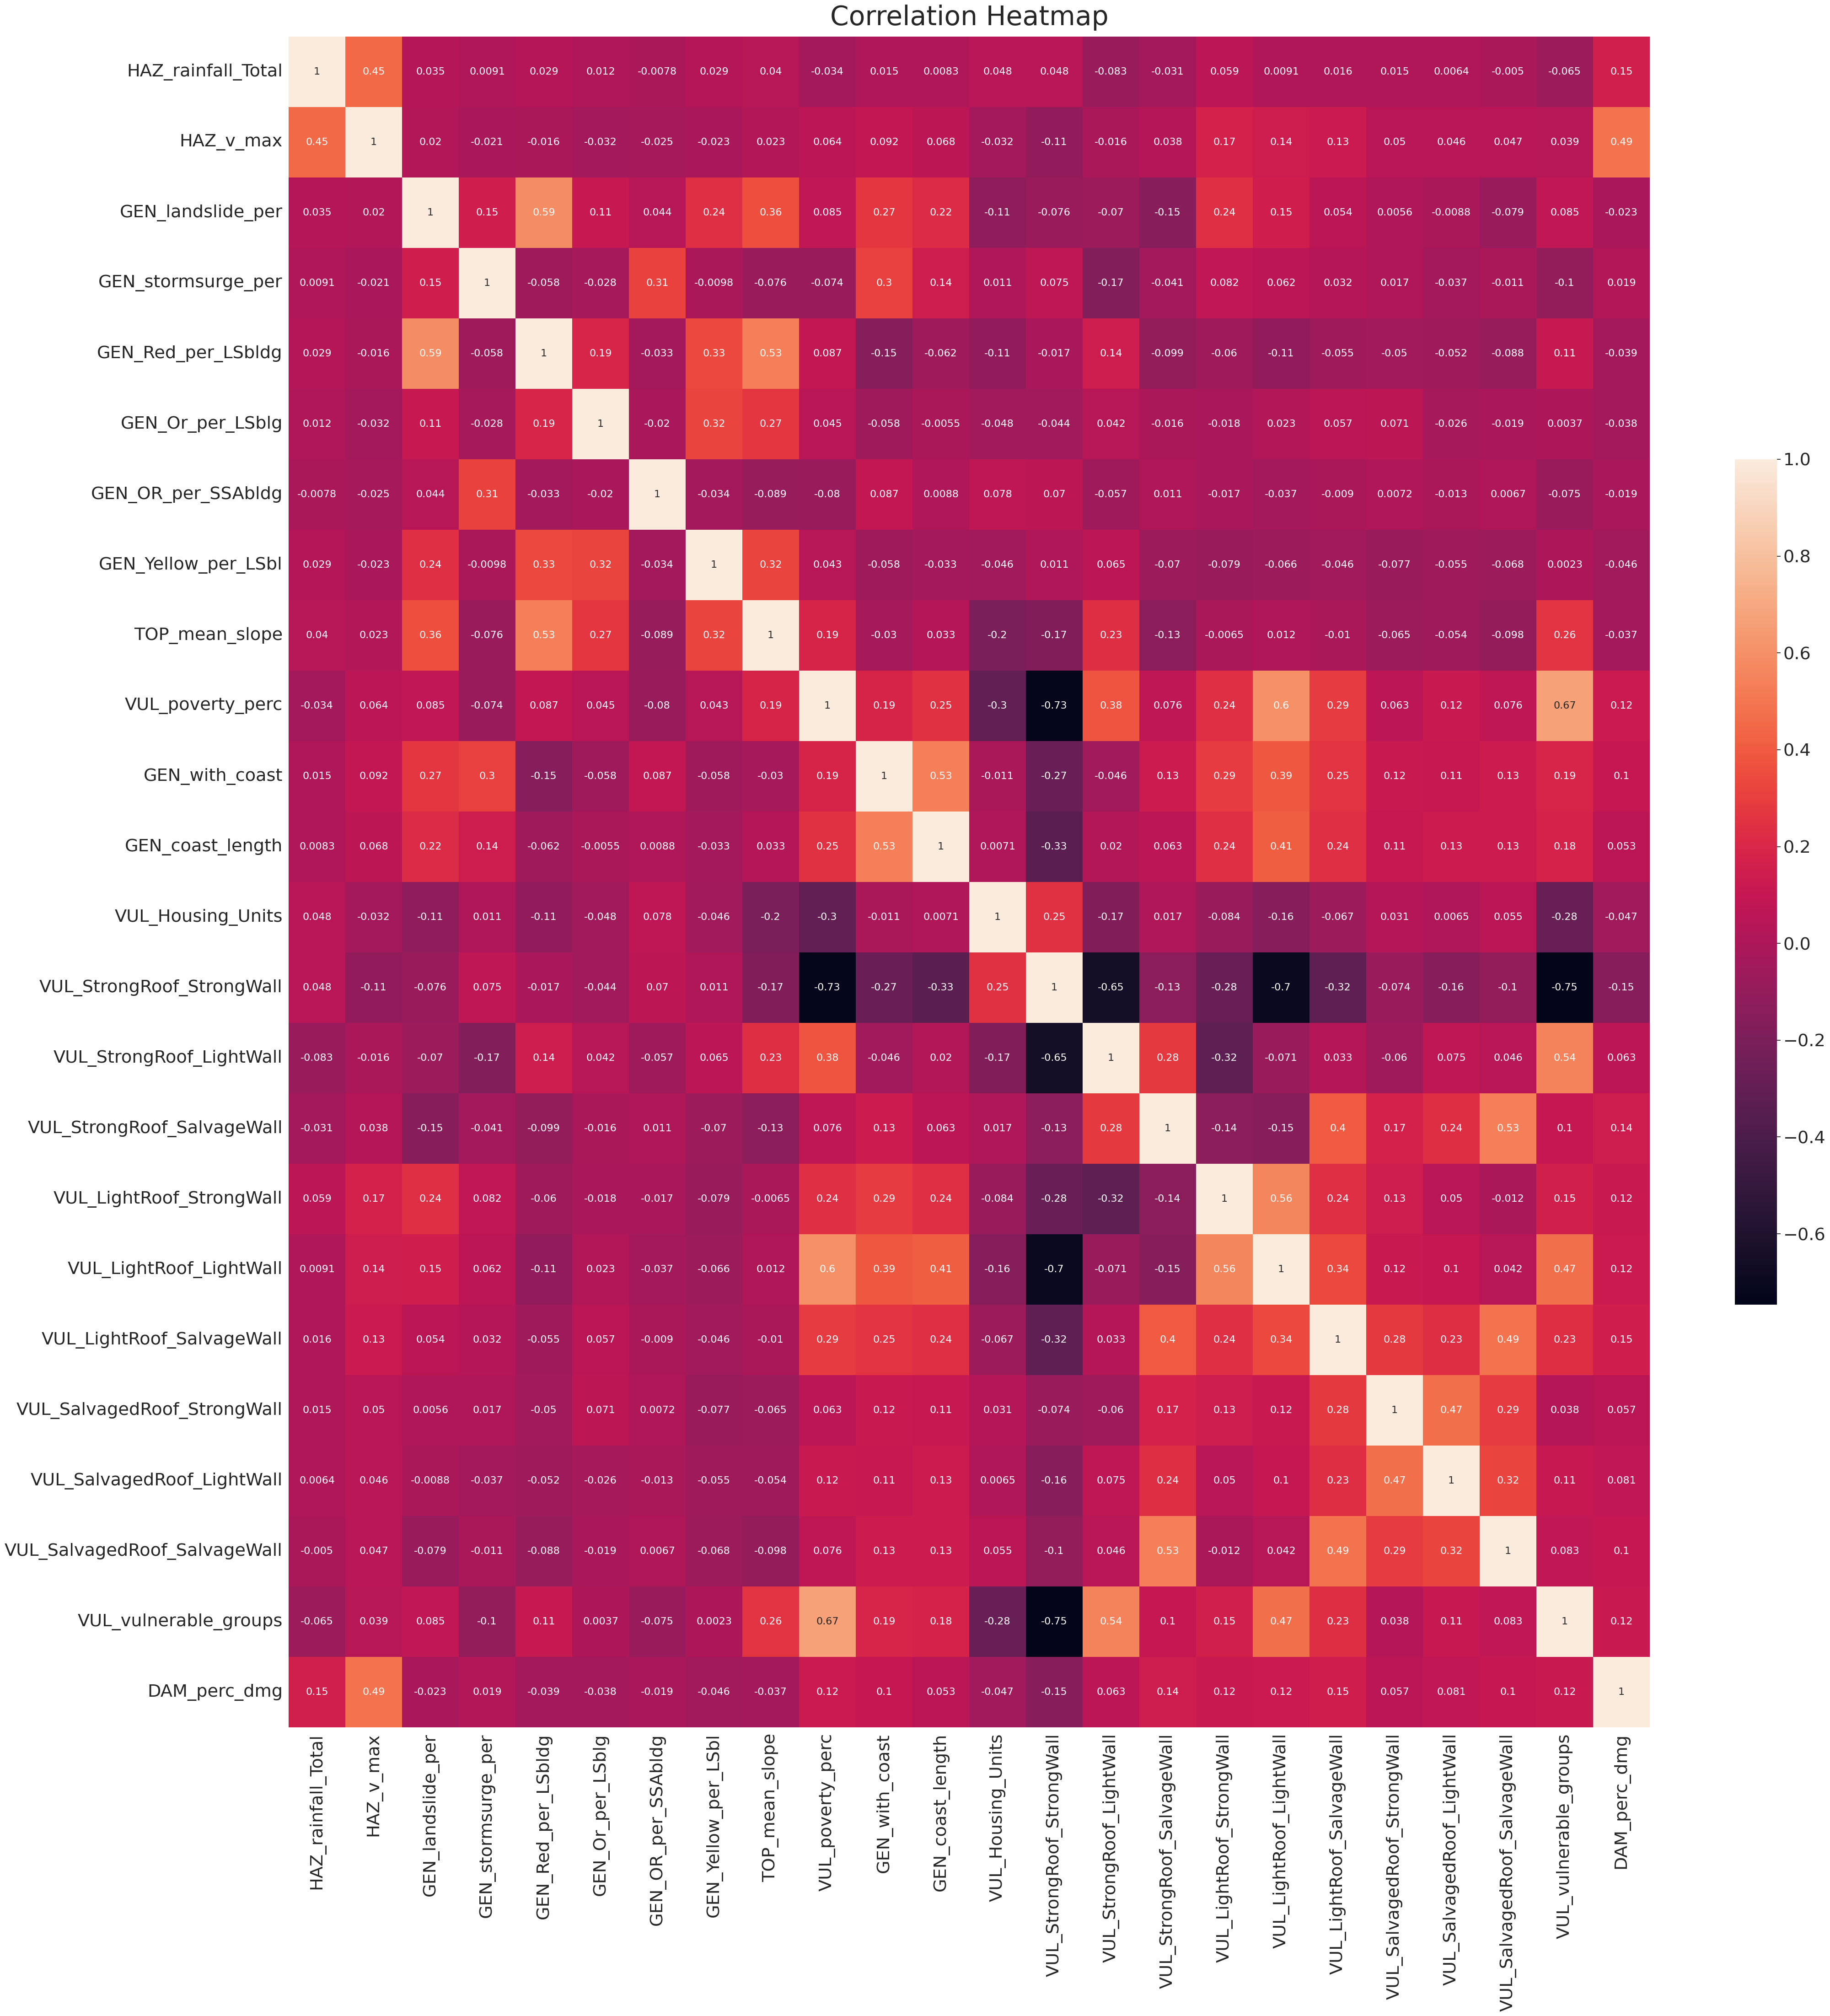

In [27]:
fig, ax = plt.subplots()

corrMatrix = df.corr()
# print (corrMatrix)

plt.rcParams["figure.figsize"] = (48, 48)
# plt.figure(figsize=(36,36))

sn.set(font_scale=2.5)
heatmap = sn.heatmap(
    corrMatrix, annot=True, cbar_kws={"shrink": 0.5}, annot_kws={"size": 16}
)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 42}, pad=18)

if save_fig:
    fig.savefig(output_dir / "corr_matrix_drop.png", format="png")

plt.show()

In [28]:
names = df.columns.tolist()
names

display(df[names])

HAZ_rainfall_Total  HAZ_v_max  GEN_landslide_per  GEN_stormsurge_per  \
0              185.828571  55.032241               2.64                6.18   
2                8.818750   8.728380               0.06                0.00   
4               24.175000  10.945624               1.52                1.28   
6               14.930000  12.108701               0.00                0.00   
7               13.550000  10.660943               5.52                0.36   
...                   ...        ...                ...                 ...   
25835            9.700000   8.136932               1.80                6.25   
25837           17.587500   9.818999               0.00                0.00   
25838           11.487500  15.791907               0.06                0.09   
25839           11.600000  13.867145               0.00                0.00   
25841           32.305556  15.647639               4.15                3.05   

       GEN_Red_per_LSbldg  GEN_Or_per_LSblg  GEN_OR_per_SSAbldg  \
0                    1.17              0.03                0.00   
2                    0.06              0.00                0.00   
4                    0.02              0.00                0.00   
6                    0.00              0.00                0.00   
7                    0.00              0.00                0.00   
...                   ...               ...                 ...   
25835                0.12              0.00                0.00   
25837                0.00              0.00                0.00   
25838                0.06              0.00                0.00   
25839                0.00              0.00                0.00   
25841                0.00              0.00                0.13   

       GEN_Yellow_per_LSbl  TOP_mean_slope  VUL_poverty_perc  ...  \
0                     0.06           16.48             11.34  ...   
2                     0.00            8.73              6.09  ...   
4                     0.00            4.58              7.87  ...   
6                     0.00            8.77              6.43  ...   
7                     0.00            9.83              9.38  ...   
...                    ...             ...               ...  ...   
25835                 0.00            6.67              6.88  ...   
25837                 0.00            0.79              3.09  ...   
25838                 0.09            7.70              2.36  ...   
25839                 0.00           11.17              4.56  ...   
25841                 0.00            2.08              7.40  ...   

       VUL_StrongRoof_LightWall  VUL_StrongRoof_SalvageWall  \
0                      8.211552                    0.097425   
2                     33.639236                    0.850008   
4                     22.963749                    0.197179   
6                     16.179723                    0.279362   
7                     32.522996                    0.065703   
...                         ...                         ...   
25835                 19.563863                    0.186916   
25837                 13.456446                    0.209059   
25838                 22.347376                    0.202748   
25839                 29.584121                    0.000000   
25841                  3.644103                    0.031146   

       VUL_LightRoof_StrongWall  VUL_LightRoof_LightWall  \
0                      2.533055                41.892832   
2                      1.218595                13.645253   
4                      0.667374                15.592295   
6                      0.675125                 7.100454   
7                      0.821288                30.354796   
...                         ...                      ...   
25835                  3.613707                32.492212   
25837                  0.383275                 4.703833   
25838                  0.090110                 3.063753   
25839                  0.094518                 3.119093   
25841  

In [29]:
"""
VIF is another method for finding highly correlated features if there is still in existence.
VIF method, picks each feature and regresses it against all of the other features so VIF value for a feature 
demonstrates the correlation of that feature in total with all the other ones, and not only with one specific feature.
Normally if the estimated VIF value for a feature is greater than 7 so it can be considered a highly correlated feature.
"""

# Implementing VIF

# The independent variables set
X = df[names]
# Creating VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i) for i in range(len(X.columns))
]


print(vif_data)

                         feature        VIF
0             HAZ_rainfall_Total   2.762248
1                      HAZ_v_max   4.766043
2              GEN_landslide_per   3.072507
3             GEN_stormsurge_per   1.432910
4             GEN_Red_per_LSbldg   2.596324
5               GEN_Or_per_LSblg   1.261555
6             GEN_OR_per_SSAbldg   1.140655
7            GEN_Yellow_per_LSbl   1.470278
8                 TOP_mean_slope   4.707812
9               VUL_poverty_perc  13.175166
10                GEN_with_coast   4.234575
11              GEN_coast_length   2.143848
12             VUL_Housing_Units   1.673781
13     VUL_StrongRoof_StrongWall   5.466895
14      VUL_StrongRoof_LightWall   7.193891
15    VUL_StrongRoof_SalvageWall   2.574345
16      VUL_LightRoof_StrongWall   2.279889
17       VUL_LightRoof_LightWall   6.669221
18     VUL_LightRoof_SalvageWall   2.248221
19   VUL_SalvagedRoof_StrongWall   1.543744
20    VUL_SalvagedRoof_LightWall   1.589639
21  VUL_SalvagedRoof_SalvageWall

In [30]:
vif_data_sort = vif_data
vif_data_sort = vif_data.sort_values("VIF")
vif_data_sort = vif_data_sort.reset_index(drop=True)
display(vif_data_sort)

feature        VIF
0             GEN_OR_per_SSAbldg   1.140655
1               GEN_Or_per_LSblg   1.261555
2             GEN_stormsurge_per   1.432910
3                   DAM_perc_dmg   1.467675
4            GEN_Yellow_per_LSbl   1.470278
5    VUL_SalvagedRoof_StrongWall   1.543744
6     VUL_SalvagedRoof_LightWall   1.589639
7              VUL_Housing_Units   1.673781
8   VUL_SalvagedRoof_SalvageWall   2.127463
9               GEN_coast_length   2.143848
10     VUL_LightRoof_SalvageWall   2.248221
11      VUL_LightRoof_StrongWall   2.279889
12    VUL_StrongRoof_SalvageWall   2.574345
13            GEN_Red_per_LSbldg   2.596324
14            HAZ_rainfall_Total   2.762248
15             GEN_landslide_per   3.072507
16                GEN_with_coast   4.234575
17                TOP_mean_slope   4.707812
18                     HAZ_v_max   4.766043
19     VUL_StrongRoof_StrongWall   5.466895
20       VUL_LightRoof_LightWall   6.669221
21      VUL_StrongRoof_LightWall   7.193891
22         VUL_vulnerable_groups   9.181807
23              VUL_poverty_perc  13.175166